In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# Data exploration.

In [3]:
df = pd.read_csv('data/clusters.csv')
df.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [9]:
df.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


In [4]:
df.isnull().sum()

A    0
B    0
C    0
dtype: int64

In [5]:
def plotDataStats(dataFrameCol):
    numpyArrData=dataFrameCol.to_numpy()
    mean=np.mean(numpyArrData)
    max=np.max(numpyArrData)
    min=np.min(numpyArrData)
    median=np.median(numpyArrData)
    
    print("Min:"+str(min)+"\n Mean:"+str(mean)+"\n max:"+str(max)+"\n median:"+str(median))
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))
    # Plot the histogram   
    ax[0].hist(numpyArrData)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median
    ax[0].axvline(x=mean, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median, color = 'red', linestyle='dashed', linewidth = 2)
    
    ax[0].axvline(x=np.percentile(numpyArrData, 1), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 5), color = 'blue', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 10), color = 'blue', linestyle=':', linewidth = 2)
    
    
    ax[0].axvline(x=np.percentile(numpyArrData, 99), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 95), color = 'black', linestyle=':', linewidth = 2)
    ax[0].axvline(x=np.percentile(numpyArrData, 90), color = 'black', linestyle=':', linewidth = 2)
    # Plot the boxplot   
    ax[1].boxplot(numpyArrData, vert=False)
    ax[1].set_xlabel('Value')

    fig.suptitle(dataFrameCol.name)
    fig.show()

In [6]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [7]:
df.dtypes

A    float64
B    float64
C    float64
dtype: object

Min:-1.6491210415172972
 Mean:1.5130805719573142
 max:4.497580985951126
 median:1.5204024649177432
Min:-1.6310064346212445
 Mean:1.5207761038047725
 max:4.4427273147431645
 median:1.5262018466080474
Min:-1.9216505275777052
 Mean:1.4983513200746723
 max:4.678731107534028
 median:1.4668409399765272


C:\Users\super\AppData\Local\Temp\ipykernel_12764\3615208041.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\super\AppData\Local\Temp\ipykernel_12764\3615208041.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\super\AppData\Local\Temp\ipykernel_12764\3615208041.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


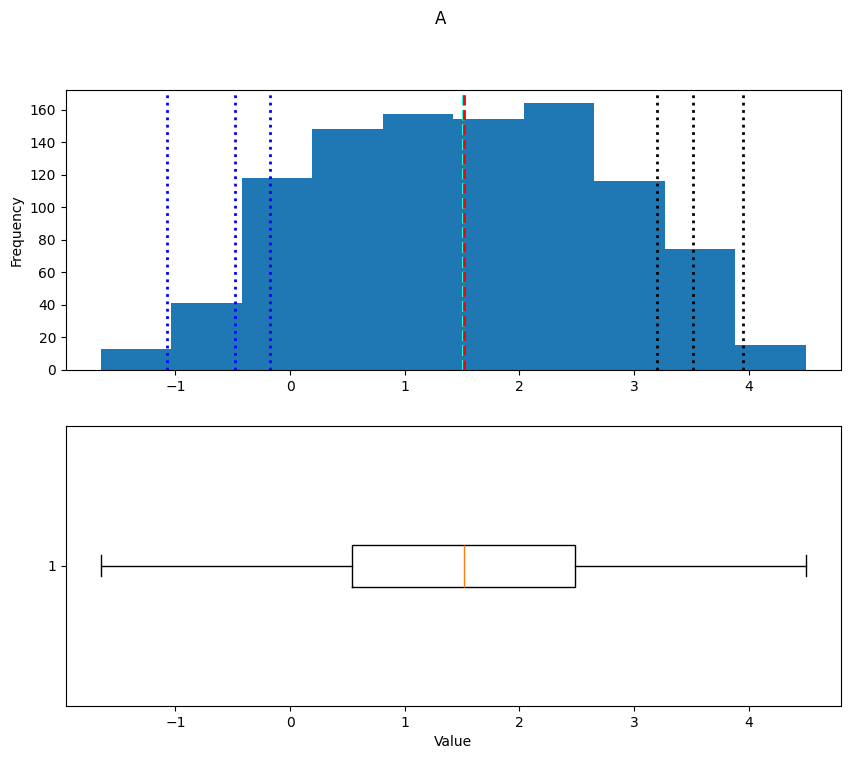

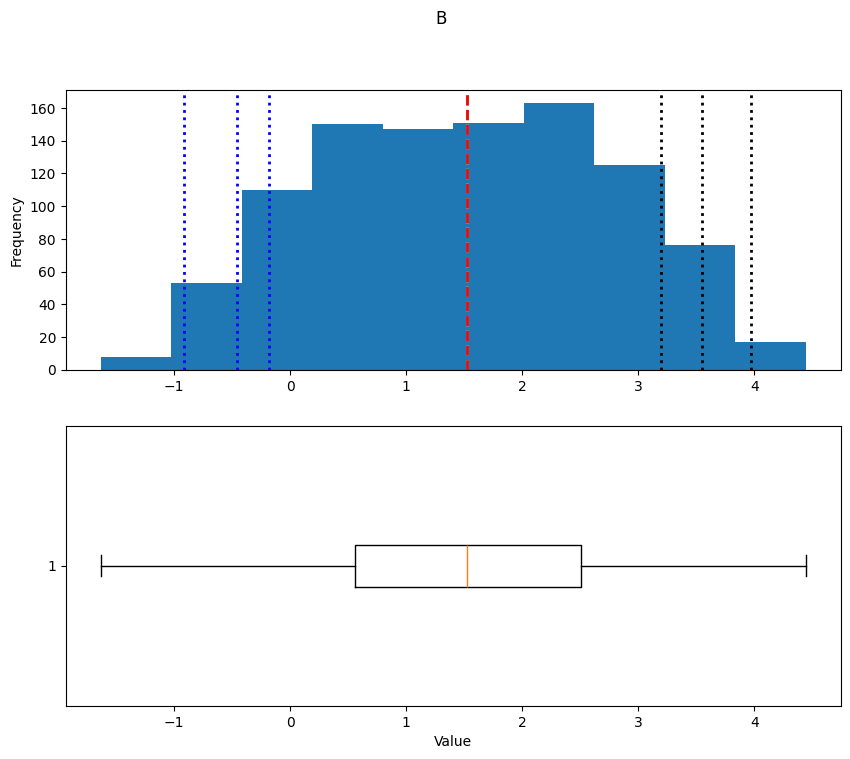

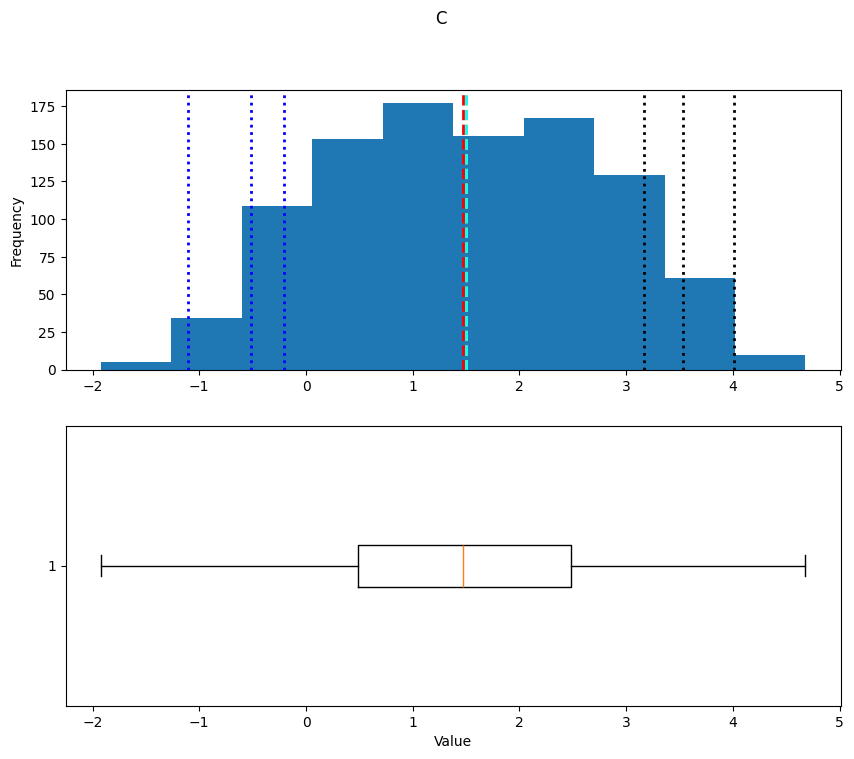

In [8]:
dfcols=df.columns.to_list()
for col in dfcols:
    plotDataStats(df[col])

As we can see there is not outliars values

### normalize the features.

In [10]:
features = df[df.columns]
scaled_features = MinMaxScaler().fit_transform(features[df.columns[0:6]])


In [11]:
# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

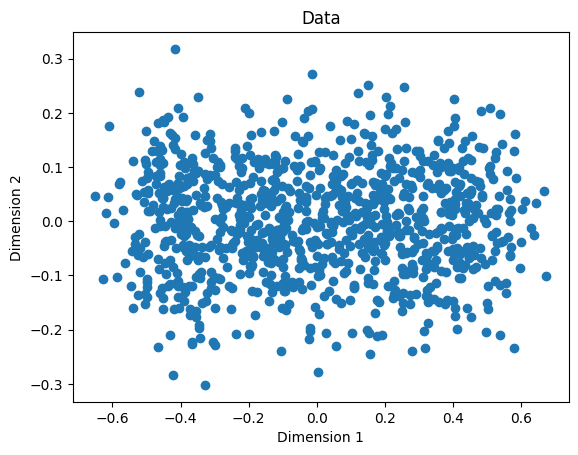

In [12]:
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

### Within cluster sum of sqares (WCSS)

c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

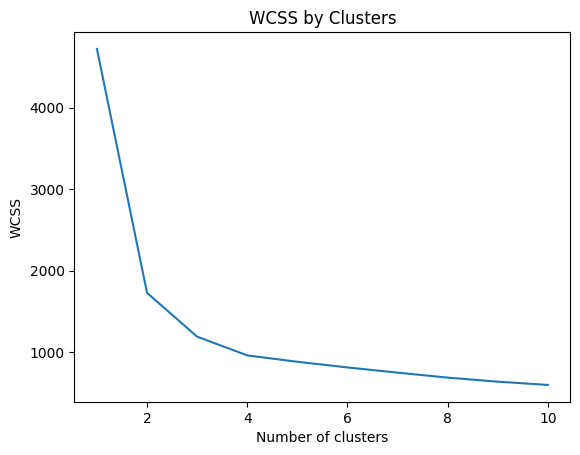

In [13]:
# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means model

In [30]:
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)


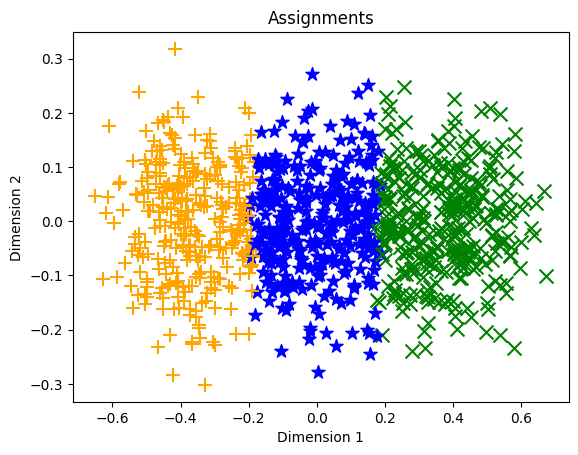

In [31]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

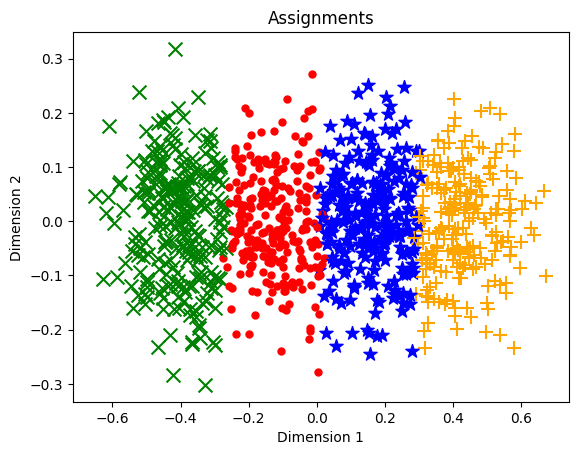

In [34]:
# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)


def plot_clusters4(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange',3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+',3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters4(features_2d, km_clusters)

## Agglomerative clustering

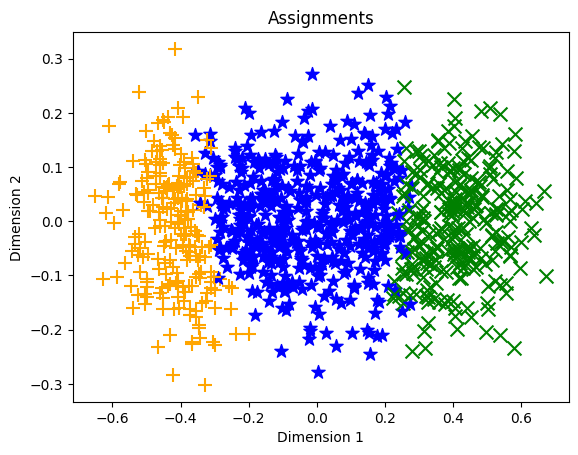

In [20]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
plot_clusters(features_2d, agg_clusters)


With 4 clusters

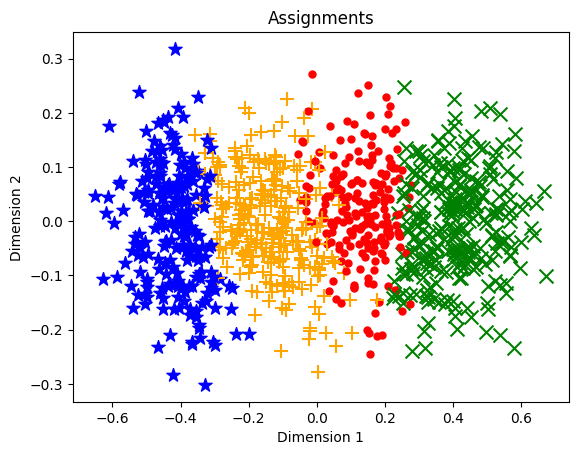

In [36]:
agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(features.values)
plot_clusters4(features_2d, agg_clusters)
